# Weekly Mortality

> A repo for collecting weekly mortality

<img src="../total_deaths.png">

Excess mortality (how much larger the number of 2020 deaths are vs previous years) is an important source of information for undertanding COVID-19. 

This data is available from many statistics bureaus. However, as far as I'm aware, it's aggregated nowhere. This is unfortunate, as researchers/journalists/random folks who want to use it have to fish it together from multiple sources.

Moreover, the data needs to be structured properly. Releases are often in human-readable excel spreadsheets, but that's not very helpful for code. Hence, I aim to put everything into easy-to-use .csv files.

Similar projects have been done by the [Economist](https://www.economist.com/graphic-detail/2020/04/16/tracking-covid-19-excess-deaths-across-countries) or [The New York Times](https://www.nytimes.com/interactive/2020/04/21/world/coronavirus-missing-deaths.html). However, their data & code are not publicly available. 

For now, I've only processed the UK and the Netherlands, but aim to include more countries soon.

The repo itself uses [nbdev](https://github.com/fastai/nbdev). All data processing is done in jupyter notebooks. The code is not very clean, let me know if there are any bugs or inaccuracies.

## Data

The data in the `dataset/` folder. It contains 3 files.

### total_deaths.csv

This file tabulates deaths by country, week for 2017 - 2020. Note that for some countries, week 0 is fractional, so it's best to start any analysis from week 1.

In [ ]:
import pandas as pd

pd.read_csv('../dataset/total_deaths.csv').head()

,Country,Week,Deaths2017,Deaths2018,Deaths2019,Deaths2020
0,Netherlands,0,469.0,3343.0,2606.0,2242.0
1,Netherlands,1,3568.0,3359.0,3262.0,3364.0
2,Netherlands,2,3637.0,3364.0,3150.0,3151.0
3,Netherlands,3,3487.0,3322.0,3178.0,3040.0
4,Netherlands,4,3626.0,3403.0,3143.0,3157.0


### excess_deaths.csv

Some countries give larger granularity than simply total deaths. They might break down the numbers by age group, region, etc. Below are the subgroups for each country.

Note that each country usually doesn't have all combinations for all subgroups. For example, the UK breaks down deaths by age, and also by geography; but it doesn't break them down by age *and* geography.

In [ ]:
from IPython.core.display import HTML
from weekly_mort.collect import SUMMARY

HTML(SUMMARY)

,Country,Year,Age,Sex,Region,Condition
0,Netherlands,"[2017, 2018, 2019, 2020]","[Total, 0-64, 65-79, 80+]","[Total, Male, Female]",[Total],[Total]
1,United Kingdom,"[2020, 2017, 2018, 2019]","[Total, 01-14, 15-44, 45-64, 65-74, 75-84, 85+, Under 1 year]","[Total, Female, Male]","[Total, North East, North West, Yorkshire and The Humber, East Midlands, West Midlands, East, London, South East, South West, Wales]","[Total, Respiratory]"


The data is already in an easy-to-use format.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

df = pd.read_csv('../dataset/excess_deaths.csv')

df.head()

,Country,Week,Year,Age,Sex,Region,Condition,Deaths
0,Netherlands,0,2017,Total,Total,Total,Total,469
1,Netherlands,1,2017,Total,Total,Total,Total,3568
2,Netherlands,2,2017,Total,Total,Total,Total,3637
3,Netherlands,3,2017,Total,Total,Total,Total,3487
4,Netherlands,4,2017,Total,Total,Total,Total,3626


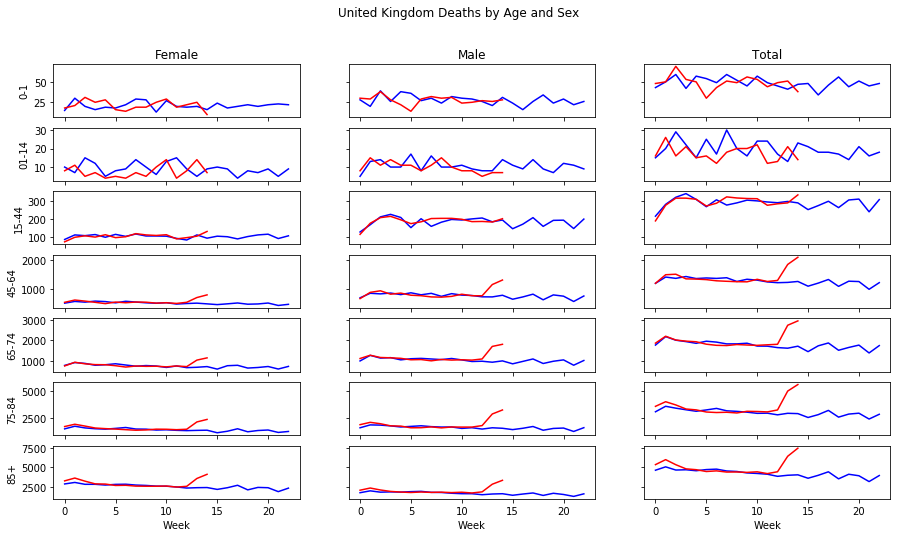

In [ ]:
uk = df[df.Country == 'United Kingdom']

uk = uk[(uk.Age != 'Total') & (uk.Region == 'Total') & (uk.Condition == 'Total')]

uk.loc[uk.Age == 'Under 1 year', 'Age'] = '0-1'

fig, axes = plt.subplots(7, 3, figsize=(15, 8), sharex=True, sharey='row')

ages = list(uk.Age.unique())
ages.sort()

for i, age in enumerate(ages):
    for j, sex in enumerate(uk.Sex.unique()):
        sub = uk[(uk.Age == age) & (uk.Sex == sex)]
        sub = sub[sub.Week <= 5 + datetime.date.today().isocalendar()[1]]
        sub2020 = sub[sub.Year == 2020]
        sub2019 = sub[sub.Year == 2019]
        axes[i, j].plot(sub2019.Week, sub2019.Deaths, color = 'b', label='Deaths in 2019')
        axes[i, j].plot(sub2020.Week, sub2020.Deaths, color = 'r', label='Deaths in 2020')
        
        if i == 0:  axes[i, j].set_title(sex)
        if j == 0:  axes[i, j].set_ylabel(age)
        if i == len(ages) - 1:  axes[i, j].set_xlabel('Week')
            
fig.suptitle('United Kingdom Deaths by Age and Sex');

### weekly_dates.csv

Week numbers differ by country: in the UK, the week ends on a Friday, in the Netherlands, on a Sunday. They also differ in how they treat the first week of the year.

In [ ]:
import pandas as pd
dates = pd.read_csv('../dataset/week_dates.csv')
dates[dates.Week == 0]

,Country,Week,Deaths2017,Deaths2018,Deaths2019,Deaths2020
0,Netherlands,0,469.0,3343.0,2606.0,2242.0
53,United Kingdom,0,11991.0,12723.0,10955.0,12254.0


In [ ]:
dates

,Country,Week,Deaths2017,Deaths2018,Deaths2019,Deaths2020
0,Netherlands,0,469.0,3343.0,2606.0,2242.0
1,Netherlands,1,3568.0,3359.0,3262.0,3364.0
2,Netherlands,2,3637.0,3364.0,3150.0,3151.0
3,Netherlands,3,3487.0,3322.0,3178.0,3040.0
4,Netherlands,4,3626.0,3403.0,3143.0,3157.0
...,...,...,...,...,...,...
100,United Kingdom,47,10538.0,10033.0,10958.0,NaN
101,United Kingdom,48,10781.0,10287.0,10816.0,NaN
102,United Kingdom,49,11217.0,10550.0,11188.0,NaN
103,United Kingdom,50,12517.0,11116.0,11926.0,NaN


## Country Sources

### Netherlands

Their API wasn't working at the time of writing, however the data access is pretty straightforward on their [website](1052).

### United Kingdom

The [Office for National Statistics](https://www.ons.gov.uk/peoplepopulationandcommunity/birthsdeathsandmarriages/deaths/datasets/weeklyprovisionalfiguresondeathsregisteredinenglandandwales) provides data for many population subgroups with a 10 day delay.

### United States

I looked at the data from the [CDC Influenza Surveillance](https://gis.cdc.gov/grasp/fluview/mortality.html) (see [nbs/_021_US.ipynb](nbs/_021_US.ipynb)). 

However, I choose not to include the data, as the counts were too low -- probably not all deaths were processed yet (despite a ">100%" flag saying otherwise). Also, there were strange artifacts, like the deaths for New York City being higher than the deaths for New York.

If anyone knows an alternative data source for the US, please let me know.

### Sweden TODO

[Source](https://www.scb.se/en/finding-statistics/statistics-by-subject-area/population/population-composition/population-statistics/#_Tablesandgraphs)

## How to contribute

If you know data sources for weekly deaths for other countries, please let me know. Either comment on github, or send an email to krisztiankovacs@fastmail.com

If you feel like contributing, you can also create a notebook that standardizes the mortality information. Here are the rough steps:
1. Create a subfolder under `_downloads` with the country name, and place all downloaded material in there.
1. Create a subfolder under `_processed` with the country name, and add two .csv files (see folders for Netherlands and UK):
  - week_dates.csv: A spreadsheet with 4 columns giving the year, week number, week start date, week end date
  - deaths.csv: A spreadsheet with minimum 3 columns: Year, Week, Deaths. If available, you can also include subgroups by age, sex, region, condition.
  
Ideally, the whole process is automated in a notebook, from downloading the files, reformatting them, and saving the above two .csv files. Sometimes however, it's easier to download manually. In that case, clearly outline the steps in the notebook on how to update the data in the future, and include and subsequent processing step.